In [ ]:
'''
Pandas - padrão excel, tabelas
Numpy - 
'''

# Setup

In [ ]:
pip install pandas

In [2]:
import pandas as pd

In [ ]:
pip install scikit-learn

In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [6]:
import numpy as np

# Aula 15

In [ ]:
'''
1- Dataframe -> dados
2- dados -> Entrada
         -> Saída  
3- Dados treinos / teste
4- modelo
5- predição
6- dados do formato Series do pandas
'''

In [15]:
s = pd.Series([10, 20, 30, 40, 50])
print(s)

0    10
1    20
2    30
3    40
4    50
dtype: int64


In [16]:
dados = pd.read_csv('./manutencao_preditiva.csv')
dados

,UDI,ID Produto,Tipo,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min],Alvo,Tipo da Falha
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [17]:
dados.columns

Index(['UDI', 'ID Produto', 'Tipo', 'Temperatura Ar [K]',
       'Temperatura Processo [K]', 'Velocidade Rotacao [rpm]', 'Torque [Nm]',
       'Desgaste Ferramenta [min]', 'Alvo', 'Tipo da Falha'],
      dtype='object')

In [18]:
# chamar variavel [[colocar dados]]
# [[]] - chama nome do dado e o dado
# [] - somente o dado
input = dados[['Temperatura Ar [K]',
       'Temperatura Processo [K]', 'Velocidade Rotacao [rpm]', 'Torque [Nm]',
       'Desgaste Ferramenta [min]']]
output = dados['Tipo da Falha']

In [19]:
input

,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [20]:
output

0       No Failure
1       No Failure
2       No Failure
3       No Failure
4       No Failure
           ...    
9995    No Failure
9996    No Failure
9997    No Failure
9998    No Failure
9999    No Failure
Name: Tipo da Falha, Length: 10000, dtype: object

In [26]:
dados['Tipo da Falha'].value_counts()

Tipo da Falha
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [21]:
# pip install sklearn

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
xtreino,xteste,ytreino,yteste = train_test_split(input,output, test_size = 0.3)

In [29]:
xtreino

,Temperatura Ar [K],Temperatura Processo [K],Velocidade Rotacao [rpm],Torque [Nm],Desgaste Ferramenta [min]
4941,303.6,312.7,1699,31.5,105
9436,298.0,308.6,1481,42.5,54
2054,299.6,309.4,1605,29.8,142
2036,299.0,308.7,1892,22.8,96
1216,296.9,308.0,1514,41.0,120
...,...,...,...,...,...
696,297.6,309.0,1815,25.3,66
274,298.1,308.0,1652,28.5,63
4836,303.3,311.8,1315,62.0,42
7223,299.8,309.6,1374,51.6,137


In [27]:
from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(hidden_layer_sizes=(100),max_iter=100, activation='relu', verbose=1)

In [28]:
# treinando rede neural

modelo.fit(xtreino, ytreino)

Iteration 1, loss = 5.88688418
Iteration 2, loss = 1.01495912
Iteration 3, loss = 0.70207711
Iteration 4, loss = 0.66762133
Iteration 5, loss = 0.59034182
Iteration 6, loss = 0.63581842
Iteration 7, loss = 0.50009179
Iteration 8, loss = 0.40232871
Iteration 9, loss = 0.40238781
Iteration 10, loss = 0.25769164
Iteration 11, loss = 0.24664976
Iteration 12, loss = 0.26202981
Iteration 13, loss = 0.31699499
Iteration 14, loss = 0.37183650
Iteration 15, loss = 0.26709792
Iteration 16, loss = 0.23751215
Iteration 17, loss = 0.25295134
Iteration 18, loss = 0.27025215
Iteration 19, loss = 0.21244874
Iteration 20, loss = 0.28034742
Iteration 21, loss = 0.26419952
Iteration 22, loss = 0.22895791
Iteration 23, loss = 0.21523448
Iteration 24, loss = 0.27577424
Iteration 25, loss = 0.24947304
Iteration 26, loss = 0.21727498
Iteration 27, loss = 0.23292127
Iteration 28, loss = 0.33732543
Iteration 29, loss = 0.21317685
Iteration 30, loss = 0.20775143
Iteration 31, loss = 0.26184617
Iteration 32, los

MLPClassifier(hidden_layer_sizes=100, max_iter=100, verbose=1)

In [30]:
ypredicao = modelo.predict(xteste)

In [31]:
ypredicao

array(['No Failure', 'No Failure', 'No Failure', ..., 'No Failure',
       'No Failure', 'No Failure'], dtype='<U24')

In [33]:
ypred = pd.Series(ypredicao)
ypred.value_counts()

No Failure            2985
Overstrain Failure      15
Name: count, dtype: int64

In [34]:
yteste.value_counts()

Tipo da Falha
No Failure                  2893
Heat Dissipation Failure      40
Power Failure                 28
Overstrain Failure            21
Tool Wear Failure             13
Random Failures                5
Name: count, dtype: int64

# parte 2

In [81]:
# Criando duas Series Pandas
s1 = pd.Series([10,20,30,40,50])
s2 = pd.Series([1,2,3,4,5])

In [82]:
# Soma
soma = s1 + s2
soma

0    11
1    22
2    33
3    44
4    55
dtype: int64

In [37]:
# Subtração
subtracao = s1 - s2

In [38]:
# Multiplicação
multiplicacao = s1 * s2

In [39]:
# Divisão
divisao = s1 / s2

In [40]:
# Criando duas Séries com nomes na coluna
s1 = pd.Series([10,20,30,40,50], name='Série 1')
s2 = pd.Series([1,2,3,4,5], name='Série 2')

In [42]:
# Criando um DataFrame a partir das Series
df = pd.DataFrame({'Série 1': s1, 'Série 2': s2})
df

,Série 1,Série 2
0,10,1
1,20,2
2,30,3
3,40,4
4,50,5


In [44]:
arr = np.array([[1,2,3],[4,5,6]])

result=arr*2
result

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [48]:
data = {'A': [1,2,3], 'B': [4,5,6]}
df = pd.DataFrame(data)

df['C'] = df['A'] + df['B']
df

,A,B,C
0,1,4,5
1,2,5,7
2,3,6,9


In [52]:
arr = np.array([[1,2,3],[4,5,6]])
element = arr[1,1]

print('Elemento acessado com NumPy:',element)

Elemento acessado com NumPy: 5


In [49]:
data = {'A': [1,2,3], 'B': [4,5,6]}
df = pd.DataFrame(data)

value = df.loc[1,'B']

print('Valor acessado com Pandas:',value)

Valor acessado com Pandas: 5


In [62]:
arr = np.array([1,2,3,4,5])

# Algebra linear com NumPy
matriz = np.array([[1,2],[3,4]])
vetor = np.array([5,6])

# Produto escalar
produto_escalar = np.dot(matriz,vetor)

# Estatística com NumPy
media = np.mean(arr)
desvio_padrao = np.std(arr)

print("Produto escalar com NumPy",produto_escalar)
print("Média",media)
print("Desvio padrão",desvio_padrao)


Produto escalar com NumPy [17 39]
Média 3.0
Desvio padrão 1.4142135623730951


In [64]:
data = {'A':[1,2,3], 'B':[4,5,6]}
df=pd.DataFrame(data)

df['C']=df['A']+df['B']

media_coluna_A=df['A'].mean()
soma_coluna_B=df['B'].sum()

print("DataFrame Pandas:")
print(df)
print("Média da coluna 'A':",media_coluna_A)
print("Soma da coluna 'B':",soma_coluna_B)

DataFrame Pandas:
   A  B  C
0  1  4  5
1  2  5  7
2  3  6  9
Média da coluna 'A': 2.0
Soma da coluna 'B': 15


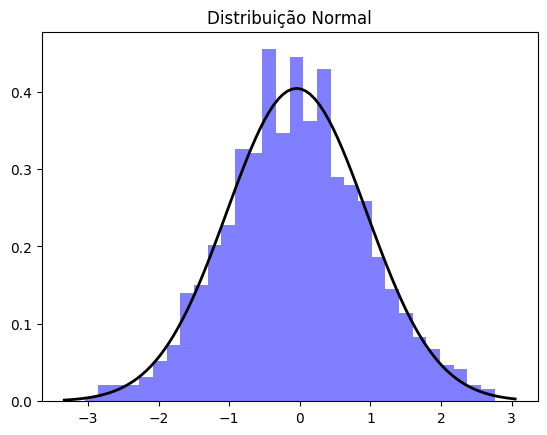

In [67]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

mean = np.mean(data)
std_dev = np.std(data)

plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição Normal')
plt.show()


In [ ]:
data={'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]}


In [68]:
# Exercício de Criação: Crie uma Pandas Series contendo os números de 1 a 10.
ps = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ps

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

In [74]:
# Exercício de Acesso: Acesse o terceiro elemento de uma Pandas Series e imprima seu valor.
ps = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ps[2]



3

In [72]:
# Exercício de Soma: Some duas Pandas Series contendo os números de 1 a 5 e os números de 6 a 10, respectivamente.
ps1 = pd.Series([1, 2, 3, 4, 5])
ps2 = pd.Series([6, 7, 8, 9, 10])

'''
ps1 = pd.Series(range(1,5))
ps2 = pd.Series(range(6,11))
'''
 
soma = ps1 + ps2
soma

0     7
1     9
2    11
3    13
4    15
dtype: int64

In [76]:
# Exercício de Filtragem: Crie uma Pandas Series contendo os números de 1 a 10 e exiba apenas os valores maiores que 5.
ps = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ps[5:]
# print(ps[ps > 5])

5     6
6     7
7     8
8     9
9    10
dtype: int64

In [87]:
# Exercício de Estatísticas: Calcule a média e o desvio padrão de uma Pandas Series contendo os números de 1 a 10.
ps = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

print(ps.mean())
ps.std()

5.5


3.0276503540974917

In [91]:
# Exercício de Concatenação: Concatene duas Pandas Series contendo os números de 1 a 5 e 6 a 10
# respectivamente, em uma única Series.

ps1 = pd.Series([1, 2, 3, 4, 5])
ps2 = pd.Series([6, 7, 8, 9, 10])
 
ps_concat = pd.concat([ps1,ps2])
ps_concat

0     1
1     2
2     3
3     4
4     5
0     6
1     7
2     8
3     9
4    10
dtype: int64

In [92]:
# Exercício de Subtração: Subtraia uma Pandas Series contendo os números de 1 a 10 por uma outra Series contendo os números de 10 a 1.
ps1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ps2 = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

'''
ps1 = pd.Series(range(1,11))
ps2 = pd.Series(range(10,0,-1))
'''
resultado = ps1 - ps2
resultado

0   -9
1   -7
2   -5
3   -3
4   -1
5    1
6    3
7    5
8    7
9    9
dtype: int64

In [94]:
ps2 = pd.Series(range(10,0,-1))
ps2

0    10
1     9
2     8
3     7
4     6
5     5
6     4
7     3
8     2
9     1
dtype: int64

In [99]:
# Exercício de Ordenação: Ordene uma Pandas Series contendo os números de 1 a 10 em ordem decrescente.
ps_ordenada = ps2.sort_values(ascending=True)
ps_ordenada

9     1
8     2
7     3
6     4
5     5
4     6
3     7
2     8
1     9
0    10
dtype: int64

In [103]:
# Exercício de Verificação de Valores Únicos: Verifique se há valores duplicados em uma Pandas Series contendo os números de 1 a 10.
ps = pd.Series([10,20,20,30,40,50])
print(ps.duplicated().any())

True


In [105]:
# Exercício de Slicing: Utilize slicing para selecionar os elementos de uma Pandas Series do terceiro ao sétimo elemento
ps = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(ps[2:7])

2    3
3    4
4    5
5    6
6    7
dtype: int64


In [ ]:
'''
1. Exercício de Criação: Crie um NumPy array contendo os números de 1 a 10.
2. Exercício de Acesso: Acesse o quarto elemento de um NumPy array e imprima seu valor.
3. Exercício de Soma: Some dois NumPy arrays contendo os números de 1 a 5 e os números
   de 6 a 10, respectivamente.
4. Exercício de Filtragem: Crie um NumPy array contendo os números de 1 a 10 e exiba apenas
   os valores maiores que 5.
5. Exercício de Estatísticas: Calcule a média e o desvio padrão de um NumPy array contendo
   os números de 1 a 10.
6. Exercício de Concatenação: Concatene dois NumPy arrays contendo os números de 1 a 5 e 6 a 10,
   respectivamente, em um único array.
7. Exercício de Subtração: Subtraia um NumPy array contendo os números de 1 a 10 por outro array
   contendo os números de 10 a 1.
8. Exercício de Ordenação: Ordene um NumPy array contendo os números de 1 a 10 em ordem decrescente.
9. Exercício de Verificação de Valores Únicos: Verifique se há valores duplicados em um NumPy array
   contendo os números de 1 a 10.
10. Exercício de Slicing: Utilize slicing para selecionar os elementos de um NumPy array do terceiro
    ao sétimo elemento
'''

In [ ]:
# 1. Exercício de Criação: Crie um NumPy array contendo os números de 1 a 10.

array = np.